In [1]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/8p2hvgdvpn-1.zip

--2025-06-08 01:48:47--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/8p2hvgdvpn-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.92.33.66, 3.5.65.113, 3.5.70.162, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.92.33.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4822534145 (4.5G) [application/zip]
Saving to: ‘8p2hvgdvpn-1.zip’

8p2hvgdvpn-1.zip    100%[===================>]   4.49G  7.27MB/s    in 9m 8s   

2025-06-08 01:58:12 (8.39 MB/s) - ‘8p2hvgdvpn-1.zip’ saved [4822534145/4822534145]



In [1]:
!unzip 8p2hvgdvpn-1.zip -d data/

Archive:  8p2hvgdvpn-1.zip
  inflating: data/Annotated Chemical Apparatus Image Dataset/Chemical Apparatus Image Dataset.zip  


In [2]:
!mkdir -p data/Chemicals
!mv "data/Annotated Chemical Apparatus Image Dataset"/* data/Chemicals/

In [3]:
!mkdir -p data/Chemicals/Apparature
!unzip "data/Chemicals/Chemical Apparatus Image Dataset.zip" -d data/Chemicals/Apparature/
!rm "data/Chemicals/Chemical Apparatus Image Dataset.zip"

Archive:  data/Chemicals/Chemical Apparatus Image Dataset.zip
   creating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/
  inflating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/Classes.names  
  inflating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/desktop.ini  
   creating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/Test/
   creating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/Test/Images/
  inflating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/Test/Images/test_0000.jpg  
  inflating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/Test/Images/test_0001.jpg  
  inflating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/Test/Images/test_0002.jpg  
  inflating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/Test/Images/test_0003.jpg  
  inflating: data/Chemicals/Apparature/Chemical Apparatus Image Dataset/Test/Images/test_0004.jpg  
  inflating: data/Chemicals/

In [4]:
!sudo mv "data/Chemicals/Apparature/Chemical Apparatus Image Dataset"/* data/Chemicals/Apparature/
!sudo rm -rf "data/Chemicals/Apparature/Chemical Apparatus Image Dataset"

In [1]:
!uv pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!uv pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Audited 1 package in 43ms
fatal: destination path 'detectron2' already exists and is not an empty directory.
Audited 11 packages in 71ms


/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/setuptools/config/_apply_pyprojecttoml.py:75: _MissingDynamic: `authors` defined outside of `pyproject.toml` is ignored.
!!

        ********************************************************************************
        The following seems to be defined outside of `pyproject.toml`:

        `authors = 'FAIR'`

        According to the spec (see the link below), however, setuptools CANNOT
        consider this value unless `authors` is listed as `dynamic`.

        https://packaging.python.org/en/latest/specifications/pyproject-toml/#declaring-project-metadata-the-project-table

        To prevent this problem, you can list `authors` under `dynamic` or alternatively
        remove the `[project]` table from your file and rely entirely on other means of
        configuration.
        ********************************************************************************

!!
  _handle_missing_dynamic(dist, project_table)
/home/andrei/dev/a

In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

/bin/bash: line 1: nvcc: command not found
torch:  2.7 ; cuda:  cu126
detectron2: 0.6


In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()


<Logger detectron2 (DEBUG)>

In [8]:
!mkdir -p data/Chemicals/Apparature/Train/ImageSets/Main
!mkdir -p data/Chemicals/Apparature/Valid/ImageSets/Main
!mkdir -p data/Chemicals/Apparature/Test/ImageSets/Main

In [9]:
import os

dataset_path = "data/Chemicals/Apparature"

# Функция для создания .txt файлов
def create_image_sets(split):
    images_dir = os.path.join(dataset_path, split, "Images")
    image_files = [f.replace(".jpg", "") for f in os.listdir(images_dir) if f.endswith(".jpg")]

    output_path = os.path.join(dataset_path, split, "ImageSets", "Main", f"{split.lower()}.txt")
    with open(output_path, "w") as f:
        f.write("\n".join(image_files))
    print(f"Создан файл: {output_path}")

# Обработка всех разделов
for split in ["Train", "Valid", "Test"]:
    create_image_sets(split)

Создан файл: data/Chemicals/Apparature/Train/ImageSets/Main/train.txt
Создан файл: data/Chemicals/Apparature/Valid/ImageSets/Main/valid.txt
Создан файл: data/Chemicals/Apparature/Test/ImageSets/Main/test.txt


In [10]:
!mv data/Chemicals/Apparature/Train/Images data/Chemicals/Apparature/Train/JPEGImages
!mv data/Chemicals/Apparature/Valid/Images data/Chemicals/Apparature/Valid/JPEGImages
!mv data/Chemicals/Apparature/Test/Images data/Chemicals/Apparature/Test/JPEGImages

In [4]:
from detectron2.data.datasets import register_pascal_voc
classes = ('hand', 'conical beaker', 'erlenmeyer flask', 'reagent bottle', 'pipette', 'eggplant shaped flask', 'separatory funnel')

# Перерегистрация датасета
register_pascal_voc("chemicals_train", "data/Chemicals/Apparature/Train", split="train", year=2007, class_names=classes)
register_pascal_voc("chemicals_valid", "data/Chemicals/Apparature/Valid", split="val", year=2007, class_names=classes)

In [12]:
import os
from xml.etree import ElementTree as ET
from xml.dom import minidom
from PIL import Image
import cv2
import random
from matplotlib import pyplot as plt

def create_voc_xml(image_path, label_lines, output_path):
    try:
        image = Image.open(image_path)
        width, height = image.size
    except Exception as e:
        print(f"Ошибка открытия изображения {image_path}: {e}")
        return

    root = ET.Element("annotation")
    ET.SubElement(root, "filename").text = os.path.basename(image_path)
    size = ET.SubElement(root, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    for line in label_lines:
        try:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1]) * width
            y_center = float(parts[2]) * height
            w = float(parts[3]) * width
            h = float(parts[4]) * height

            x_min = int(x_center - w / 2)
            y_min = int(y_center - h / 2)
            x_max = int(x_center + w / 2)
            y_max = int(y_center + h / 2)

            obj = ET.SubElement(root, "object")
            ET.SubElement(obj, "name").text = classes[class_id]
            ET.SubElement(obj, "pose").text = "Unspecified"
            ET.SubElement(obj, "truncated").text = "0"
            ET.SubElement(obj, "difficult").text = "0"
            bbox = ET.SubElement(obj, "bndbox")
            ET.SubElement(bbox, "xmin").text = str(x_min)
            ET.SubElement(bbox, "ymin").text = str(y_min)
            ET.SubElement(bbox, "xmax").text = str(x_max)
            ET.SubElement(bbox, "ymax").text = str(y_max)
        except Exception as e:
            print(f"Ошибка обработки строки {line} в {image_path}: {e}")

    try:
        xml_str = minidom.parseString(ET.tostring(root)).toprettyxml(indent="    ")
        with open(output_path, "w") as f:
            f.write(xml_str)
        print(f"Создан файл: {output_path}")
    except Exception as e:
        print(f"Ошибка сохранения XML {output_path}: {e}")

matplotlib data path: /home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data
CONFIGDIR=/root/.config/matplotlib
interactive is False
platform is linux
CACHEDIR=/root/.cache/matplotlib
Using fontManager instance from /root/.cache/matplotlib/fontlist-v390.json


In [13]:
from tqdm import tqdm

splits = ["Train", "Valid", "Test"]

for split in splits:
    images_dir = os.path.join(dataset_path, split, "JPEGImages")
    labels_dir = os.path.join(dataset_path, split, "Labels")
    annotations_dir = os.path.join(dataset_path, split, "Annotations")

    # Создаем папку Annotations, если её нет
    os.makedirs(annotations_dir, exist_ok=True)
    print(f"\nОбработка {split}...")

    # Получаем список файлов
    label_files = [f for f in os.listdir(labels_dir) if f.endswith(".txt")]

    # Обрабатываем каждый файл
    for label_file in tqdm(label_files, desc=f"Преобразование {split}"):
        image_file = label_file.replace(".txt", ".jpg")
        image_path = os.path.join(images_dir, image_file)
        label_path = os.path.join(labels_dir, label_file)
        annotation_path = os.path.join(annotations_dir, label_file.replace(".txt", ".xml"))

        if not os.path.exists(image_path):
            print(f"Изображение не найдено: {image_path}")
            continue

        try:
            with open(label_path, "r") as f:
                lines = f.readlines()

            create_voc_xml(image_path, lines, annotation_path)
        except Exception as e:
            print(f"Ошибка обработки {label_file}: {e}")


Обработка Train...


Преобразование Train:   3%|█▍                                                      | 113/4303 [00:00<00:03, 1123.33it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0817.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1875.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0905.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2367.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2501.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2823.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3153.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0673.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3629.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1462.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2652.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1270.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3702.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3

Преобразование Train:   6%|███                                                     | 237/4303 [00:00<00:03, 1190.78it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1521.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1131.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1810.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0113.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4241.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0491.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3811.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3448.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3109.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2243.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1244.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1769.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0445.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3

Преобразование Train:  11%|██████▏                                                 | 478/4303 [00:00<00:03, 1192.22it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0437.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0277.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1889.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4024.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2330.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2332.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3886.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1321.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3278.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3275.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1185.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2965.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1731.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1

Преобразование Train:  17%|█████████▍                                              | 724/4303 [00:00<00:02, 1209.95it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0151.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0336.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0315.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4236.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1140.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2777.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2602.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0301.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0474.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0545.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2412.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3625.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4188.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1

Преобразование Train:  22%|████████████▌                                           | 968/4303 [00:00<00:02, 1204.78it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3812.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2860.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0350.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0992.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3514.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1621.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0828.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0510.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0321.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0043.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1626.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0890.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2500.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2

Преобразование Train:  28%|███████████████▌                                       | 1215/4303 [00:01<00:02, 1218.48it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0766.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2055.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1172.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0033.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2374.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3418.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1252.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1091.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1794.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4064.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2074.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2636.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0782.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0

Преобразование Train:  34%|██████████████████▋                                    | 1459/4303 [00:01<00:02, 1214.93it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1968.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1631.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1866.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2968.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3188.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2826.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1804.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3530.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3215.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0955.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1619.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0612.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1232.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4

Преобразование Train:  40%|█████████████████████▊                                 | 1703/4303 [00:01<00:02, 1203.61it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1099.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3897.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0593.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2784.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1842.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0429.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1928.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2417.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2654.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0838.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3803.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3147.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2462.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3

Преобразование Train:  45%|████████████████████████▉                              | 1948/4303 [00:01<00:01, 1205.84it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3070.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2032.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1001.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2135.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0952.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3874.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1143.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0625.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3618.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3646.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1269.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2027.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3420.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1

Преобразование Train:  51%|████████████████████████████                           | 2191/4303 [00:01<00:01, 1207.62it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0230.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2307.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3831.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1622.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3516.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3568.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1187.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1707.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2828.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4119.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0783.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1984.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0081.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4

Преобразование Train:  54%|█████████████████████████████▌                         | 2312/4303 [00:01<00:01, 1208.00it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1925.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1438.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2144.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3183.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2546.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2844.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4117.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0570.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0904.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0413.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0868.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1580.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2512.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4

Преобразование Train:  59%|████████████████████████████████▋                      | 2557/4303 [00:02<00:01, 1118.02it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0054.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2996.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3592.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0892.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3372.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3574.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1282.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1245.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0776.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2223.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2543.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1317.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1194.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3

Преобразование Train:  65%|███████████████████████████████████▋                   | 2795/4303 [00:02<00:01, 1151.37it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2361.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2381.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3869.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2441.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2090.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0320.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2958.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0116.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3349.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3282.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3255.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2156.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1511.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4

Преобразование Train:  70%|██████████████████████████████████████▋                | 3031/4303 [00:02<00:01, 1163.79it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2049.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3873.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2964.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1395.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0720.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0218.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2719.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0995.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0398.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3844.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1412.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1933.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0354.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3

Преобразование Train:  76%|█████████████████████████████████████████▊             | 3267/4303 [00:02<00:00, 1163.75it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2139.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3754.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2169.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1871.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3049.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3941.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2991.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2375.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3381.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1349.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1692.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3385.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1608.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2

Преобразование Train:  84%|██████████████████████████████████████████████▍        | 3632/4303 [00:03<00:00, 1196.44it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0870.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2946.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0123.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3781.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2904.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2343.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0171.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2048.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2134.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2540.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2440.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0419.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2346.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1

Преобразование Train:  90%|█████████████████████████████████████████████████▍     | 3872/4303 [00:03<00:00, 1192.01it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2560.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1955.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4246.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3706.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1598.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3007.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3293.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2955.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3469.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1366.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4137.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0564.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2785.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1

Преобразование Train:  96%|████████████████████████████████████████████████████▌  | 4112/4303 [00:03<00:00, 1186.02it/s]

Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1591.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0921.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0906.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_4090.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3061.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1220.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1404.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3984.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3280.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3854.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1723.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3620.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2278.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1

Преобразование Train: 100%|███████████████████████████████████████████████████████| 4303/4303 [00:03<00:00, 1184.50it/s]


Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2992.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1945.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3641.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3127.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3027.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_1472.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0779.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3311.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3522.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_3273.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0843.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0658.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_2461.xml
Создан файл: data/Chemicals/Apparature/Train/Annotations/train_0

Преобразование Valid:   0%|                                                                     | 0/570 [00:00<?, ?it/s]

Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0510.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0181.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0157.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0525.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0409.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0071.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0350.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0082.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0036.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0490.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0000.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0450.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0329.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0

Преобразование Valid:  42%|███████████████████████▊                                 | 238/570 [00:00<00:00, 1178.23it/s]

Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0111.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0347.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0045.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0194.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0279.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0288.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0319.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0360.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0256.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0174.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0239.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0532.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0309.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0

Преобразование Valid:  83%|███████████████████████████████████████████████▎         | 473/570 [00:00<00:00, 1152.81it/s]

Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0564.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0060.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0276.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0262.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0317.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0324.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0287.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0444.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0210.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0222.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0518.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0316.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0289.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0

Преобразование Valid: 100%|█████████████████████████████████████████████████████████| 570/570 [00:00<00:00, 1057.89it/s]


Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0330.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0269.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0024.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0072.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0112.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0556.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0023.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0061.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0168.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0529.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0459.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0195.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0440.xml
Создан файл: data/Chemicals/Apparature/Valid/Annotations/valid_0

Преобразование Test:   0%|                                                                      | 0/205 [00:00<?, ?it/s]

Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0095.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0028.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0066.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0179.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0020.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0147.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0193.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0068.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0108.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0126.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0129.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0071.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0099.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0063.xml
Создан файл: data/Ch

Преобразование Test:  65%|█████████████████████████████████████▋                    | 133/205 [00:00<00:00, 1321.59it/s]

Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0008.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0162.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0000.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0130.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0137.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0087.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0004.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0069.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0127.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0125.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0164.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0030.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0170.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0002.xml
Создан файл: data/Ch

Преобразование Test: 100%|██████████████████████████████████████████████████████████| 205/205 [00:00<00:00, 1291.99it/s]

Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0018.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0076.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0135.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0141.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0035.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0201.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0041.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0189.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0011.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0197.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0199.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0154.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0042.xml
Создан файл: data/Chemicals/Apparature/Test/Annotations/test_0180.xml
Создан файл: data/Ch

In [ ]:
!mv data/Chemicals/Apparature/Valid/ImageSets/Main/valid.txt data/Chemicals/Apparature/Valid/ImageSets/Main/val.txt

In [6]:
from detectron2.config import get_cfg
cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")
cfg.DATASETS.TRAIN = ("chemicals_train",)
cfg.DATASETS.TEST = ("chemicals_valid",)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7  # 7 классов
cfg.DATASETS.USE_PROPOSALS = False  # Отключает использование предложений
cfg.MODEL.LOAD_PROPOSALS = False
cfg.DATASETS.PROPOSAL_FILES_TRAIN = None
cfg.DATASETS.PROPOSAL_FILES_VAL = None

cfg.SOLVER.MAX_ITER = 20
cfg.OUTPUT_DIR = "./output_new"

# Обучение
from detectron2.engine import DefaultTrainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/08 22:49:32 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Some model parameters or buffers are not found in the checkpoint:
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
The checkpoint state_dict contains keys that are not used by the model:
  fc1000.{bias, weight}
  stem.conv1.bias


[06/08 22:49:34 d2.engine.train_loop]: Starting training from iteration 0
Saving checkpoint to ./output_new/model_final.pth
[06/08 23:17:23 d2.utils.events]:  eta: 0:00:00  iter: 19  total_loss: 0.7224  loss_cls: 0.3201  loss_box_reg: 0.07028  loss_rpn_cls: 0.1318  loss_rpn_loc: 0.0306    time: 85.7212  last_time: 88.1221  data_time: 0.2378  last_data_time: 0.2298   lr: 0.019001  max_mem: 17698M
[06/08 23:17:23 d2.engine.hooks]: Overall training speed: 18 iterations in 0:25:42 (85.7212 s / it)
[06/08 23:17:23 d2.engine.hooks]: Total training time: 0:25:44 (0:00:01 on hooks)
[06/08 23:17:24 d2.data.build]: Distribution of instances among all 7 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|     hand      | 114          | conical bea.. | 162          | erlenmeyer .. | 351          |
| reagent bot.. | 612          |    pipette    | 270

In [23]:
cfg2 = get_cfg()
cfg2.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")

cfg2.DATASETS.TRAIN = ("chemicals_train",)
cfg2.DATASETS.TEST = ("chemicals_valid",)
cfg2.MODEL.ROI_HEADS.NUM_CLASSES = 7

cfg2.INPUT.MIN_SIZE_TRAIN = (256,)
cfg2.INPUT.MAX_SIZE_TRAIN = 512
cfg2.INPUT.MIN_SIZE_TEST = 256
cfg2.INPUT.MAX_SIZE_TEST = 512

cfg2.SOLVER.BASE_LR = 0.001
cfg2.SOLVER.IMS_PER_BATCH = 2
cfg2.SOLVER.MAX_ITER = 20
cfg2.SOLVER.STEPS = []

cfg2.TEST.EVAL_PERIOD = 0
cfg2.OUTPUT_DIR = "./output_fast"

trainer2 = DefaultTrainer(cfg2)
trainer2.resume_or_load(resume=False)
trainer2.train()

# Оценка после обучения
from detectron2.evaluation import PascalVOCDetectionEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator2 = PascalVOCDetectionEvaluator("chemicals_valid")
val_loader2 = build_detection_test_loader(cfg2, "chemicals_valid")
inference_on_dataset(trainer2.model, val_loader2, evaluator2)

[06/08 18:27:50 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Some model parameters or buffers are not found in the checkpoint:
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
The checkpoint state_dict contains keys that are not used by the model:
  fc1000.{bias, weight}
  stem.conv1.bias


[06/08 18:27:52 d2.engine.train_loop]: Starting training from iteration 0
Saving checkpoint to ./output_fast/model_final.pth
[06/08 18:28:34 d2.utils.events]:  eta: 0:00:00  iter: 19  total_loss: 0.9967  loss_cls: 0.392  loss_box_reg: 0.03325  loss_rpn_cls: 0.6286  loss_rpn_loc: 0.02614    time: 2.1541  last_time: 2.5611  data_time: 0.0227  last_data_time: 0.0089   lr: 0.00095005  max_mem: 18494M
[06/08 18:28:34 d2.engine.hooks]: Overall training speed: 18 iterations in 0:00:38 (2.1542 s / it)
[06/08 18:28:34 d2.engine.hooks]: Total training time: 0:00:39 (0:00:01 on hooks)
[06/08 18:28:34 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(256, 256), max_size=512, sample_style='choice')]
[06/08 18:28:34 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[06/08 18:28:34 d2.data.common]: Serializing 570 elements to byte tensors and concatenating them all ...
[06/08 18:28:34 d2

OrderedDict([('bbox',
              {'AP': np.float64(0.0),
               'AP50': np.float64(0.0),
               'AP75': np.float64(0.0)})])

matplotlib data path: /home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data
CONFIGDIR=/root/.config/matplotlib
interactive is False
platform is linux
CACHEDIR=/root/.cache/matplotlib
Using fontManager instance from /root/.cache/matplotlib/fontlist-v390.json
[06/08 22:45:37 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://ImageNetPretrained/MSRA/R-50.pkl ...
URL https://dl.fbaipublicfiles.com/detectron2/ImageNetPretrained/MSRA/R-50.pkl cached in /root/.torch/iopath_cache/detectron2/ImageNetPretrained/MSRA/R-50.pkl
[Checkpointer] Loading from /root/.torch/iopath_cache/detectron2/ImageNetPretrained/MSRA/R-50.pkl ...
[06/08 22:45:37 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[06/08 22:45:37 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up - Total num: 54


Some model parameters or buffers are not found in the checkpoint:
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
The checkpoint state_dict contains keys that are not used by the model:
  fc1000.{bias, weight}
  stem.conv1.bias
/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Tri

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf'

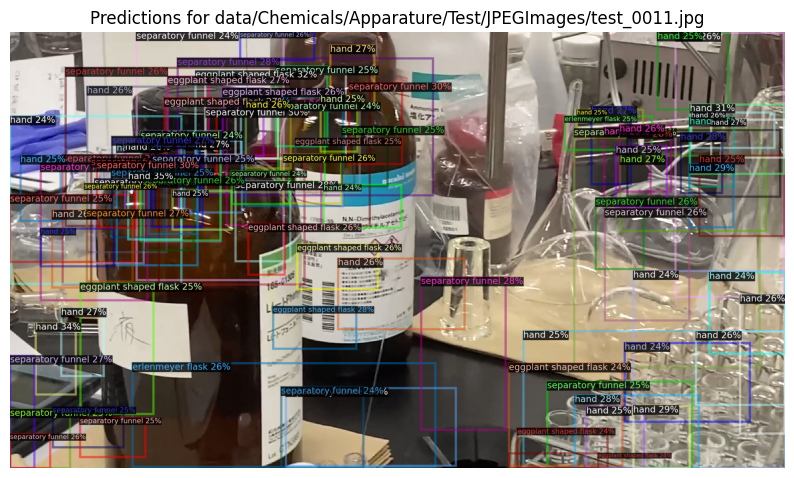

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.806661478678386.
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXG

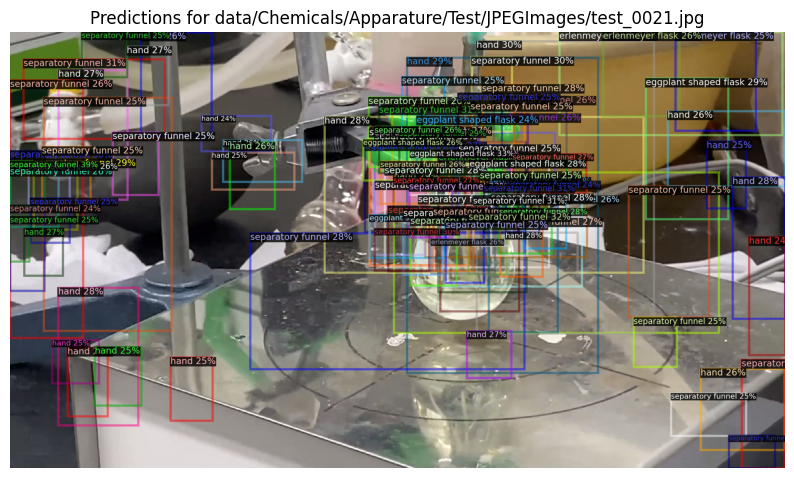

In [5]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer

cfg2 = get_cfg()
cfg2.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")

cfg2.DATASETS.TRAIN = ("chemicals_train",)
cfg2.DATASETS.TEST = ("chemicals_valid",)
cfg2.MODEL.ROI_HEADS.NUM_CLASSES = 7

cfg2.INPUT.MIN_SIZE_TRAIN = (256,)
cfg2.INPUT.MAX_SIZE_TRAIN = 512
cfg2.INPUT.MIN_SIZE_TEST = 256
cfg2.INPUT.MAX_SIZE_TEST = 512

cfg2.SOLVER.BASE_LR = 0.001
cfg2.SOLVER.IMS_PER_BATCH = 2
cfg2.SOLVER.MAX_ITER = 20
cfg2.SOLVER.STEPS = []

cfg2.TEST.EVAL_PERIOD = 0
cfg2.OUTPUT_DIR = "./output_fast"




import cv2
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt

# Настройка предиктора
predictor = DefaultPredictor(cfg2)

# Пути к тестовым изображениям
test_images = ["data/Chemicals/Apparature/Test/JPEGImages/test_0011.jpg", "data/Chemicals/Apparature/Test/JPEGImages/test_0021.jpg"]

for img_path in test_images:
    img = cv2.imread(img_path)
    outputs = predictor(img)

    # Визуализация
    v = Visualizer(img[:, :, ::-1], MetadataCatalog.get("chemicals_valid"), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(out.get_image())
    plt.axis("off")
    plt.title(f"Predictions for {img_path}")
    plt.show()


In [ ]:
from detectron2.config import get_cfg
cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")
cfg.DATASETS.TRAIN = ("chemicals_train",)
cfg.DATASETS.TEST = ("chemicals_valid",)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7  # 7 классов
cfg.DATASETS.USE_PROPOSALS = False  # Отключает использование предложений
cfg.MODEL.LOAD_PROPOSALS = False
cfg.DATASETS.PROPOSAL_FILES_TRAIN = None
cfg.DATASETS.PROPOSAL_FILES_VAL = None

cfg.SOLVER.MAX_ITER = 20
cfg.OUTPUT_DIR = "./output_new"

# Обучение

import cv2
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt

# Настройка предиктора
predictor = DefaultPredictor(cfg)

# Пути к тестовым изображениям
test_images = ["data/Chemicals/Apparature/Train/JPEGImages/train_0012.jpg"]

for img_path in test_images:
    img = cv2.imread(img_path)
    outputs = predictor(img)

    # Визуализация
    v = Visualizer(img[:, :, ::-1], MetadataCatalog.get("chemicals_valid"), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(out.get_image())
    plt.axis("off")
    plt.title(f"Predictions for {img_path}")
    plt.show()


[06/08 23:34:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://ImageNetPretrained/MSRA/R-50.pkl ...
[Checkpointer] Loading from /root/.torch/iopath_cache/detectron2/ImageNetPretrained/MSRA/R-50.pkl ...
[06/08 23:34:17 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[06/08 23:34:17 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up - Total num: 54


Some model parameters or buffers are not found in the checkpoint:
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
The checkpoint state_dict contains keys that are not used by the model:
  fc1000.{bias, weight}
  stem.conv1.bias


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.10825777053833.
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
findfont: score(FontEntry(fname='/home/andrei/dev/ai/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGen